Tutorial TESS

By: Marcela López


In [16]:
#Modules
import lightkurve as lk 
%matplotlib inline
from lightkurve.correctors import RegressionCorrector, DesignMatrix
from lightkurve.correctors import PLDCorrector
import warnings
import os
import datetime
import Obtain_LC as lc

In [17]:
PATH= datetime.datetime.now().strftime('TESS_%Y%m%dT%H%M%S')
os.makedirs(PATH)

In [18]:
Search_data= lk.search_lightcurve("TOI-3486.01", author= ['SPOC', 'TESS-SPOC']) #Modify as wanted
Search_data

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 66,2023,SPOC,120,221861843,0.0
1,TESS Sector 66,2023,TESS-SPOC,200,221861843,0.0


In [22]:
#Data from the planet
#Please Change as wanted

T0=2459382.5174 #Transit Midpoint
T0= T0 - 2457000
P= 2.2177820 #Period
binned= 0.005
transits= []

Example with TOI-122

In [20]:
#Download the data you want

sector_data= Search_data[0].download()
sector_name= 'sector_seleccionado'

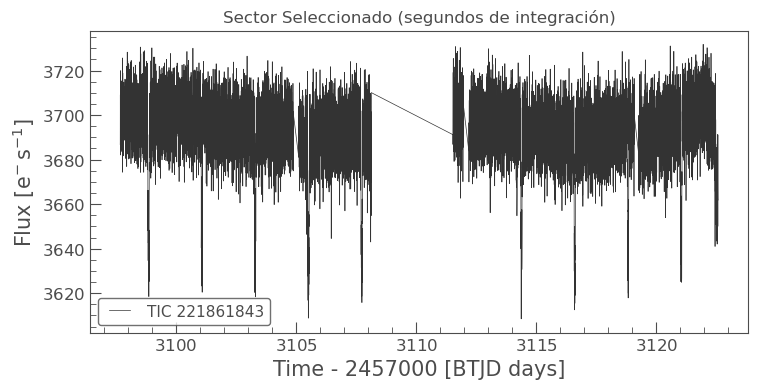

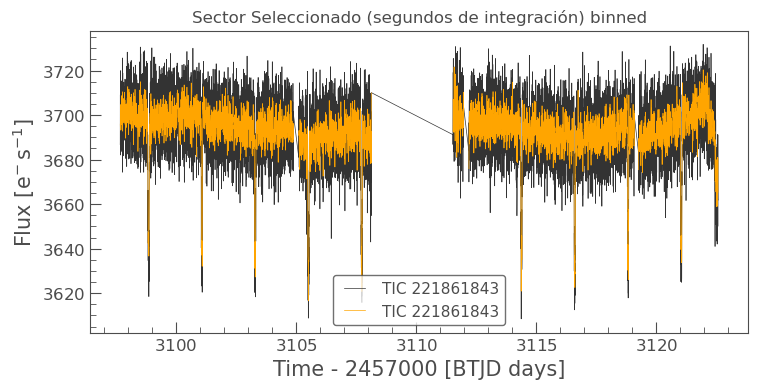

In [21]:
#Removing outliers from your data and Binned
#Play with this if you want ^^
lc.rem_outliers(sector_data, PATH, binned,'Sector Seleccionado (segundos de integración)') #Change the name as your desire!!

Range of time: 3097.6788014938506 - 3124.222996503549
Transit midpoint T0: 2382.5173999997787
T0 adjustes to range: 3096.643203999779
Transit times:  [3098.860985999779, 3101.078767999779, 3103.296549999779, 3105.514331999779, 3107.732113999779, 3109.949895999779, 3112.167677999779, 3114.385459999779, 3116.603241999779, 3118.821023999779, 3121.038805999779, 3123.256587999779]


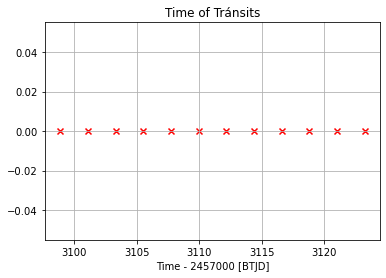

[3098.860985999779, 3101.078767999779, 3103.296549999779, 3105.514331999779, 3107.732113999779, 3109.949895999779, 3112.167677999779, 3114.385459999779, 3116.603241999779, 3118.821023999779, 3121.038805999779, 3123.256587999779]


In [23]:
#Identify when the transits will happen (Assuming there is no TTV)

lc.transit_identif(sector_data, T0, P, transits)
print(transits)

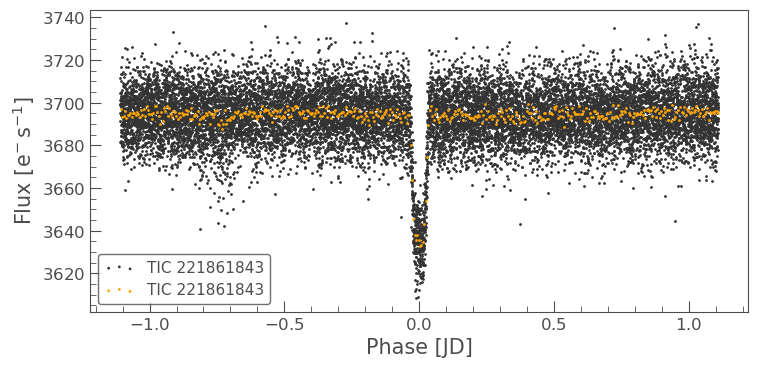

Saving data...



Data_sector_seleccionado_PF.csv SAVED in  TESS_20240927T212430  folder.
Data_sector_seleccionado_NoPF.csv SAVED in  TESS_20240927T212430  folder.


In [24]:
#Save the data:
#Phase folding data as 
#"Raw" data
#Also, shows phase folding plot binned
#Be careful!! This process take some time


lc.save_data(sector_data, T0, P, PATH, binned, sector_name)

Now you have the phase folding and the raw data of TESS

Now it's time to work with it.

       time           flux    flux_err ...  pos_corr1     pos_corr2   
------------------ --------- --------- ... ------------ --------------
3097.6788014938506 3686.7812 10.859773 ... -0.042922933   0.0075925626
3097.6801903997916 3687.4697 10.854498 ... -0.045192618 -0.00054203795
3097.6815793061987 3700.2759 10.861846 ... -0.044133961   0.0016651732
 3097.682968212139 3709.0583 10.883276 ... -0.044517856    0.005862786
3097.6843571180793 3701.2366 10.870111 ... -0.046477251   0.0018942468
 3097.685746024486 3691.2932 10.861969 ... -0.045373179   0.0058892206
 3097.687134930427  3682.053 10.854766 ... -0.043725014   0.0016674269
               ...       ...       ... ...          ...            ...
3124.2146633719835        --        -- ...  0.049969472   -0.022676257
 3124.216052227168        --        -- ...  0.039072264    -0.04744317
 3124.217441082351        --        -- ...  0.044358958   -0.021601928
 3124.218829937534        --        -- ...   0.05415073    -0.02115427
3124.2

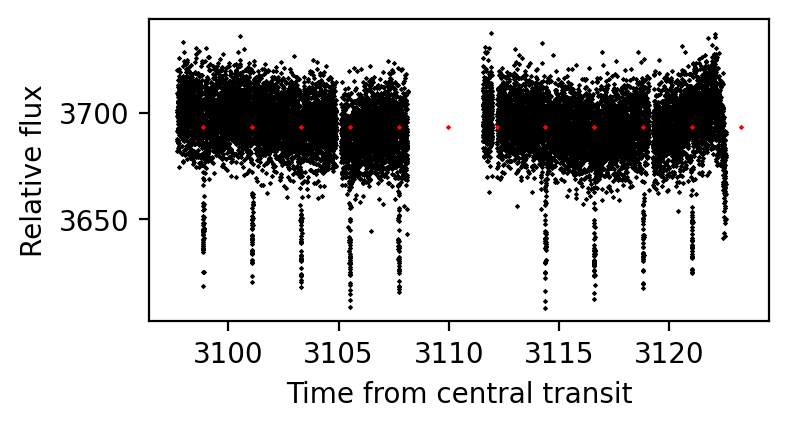

In [25]:
#Working with Raw data

#PATH= 'TESS_20240927T203045'   #PATH NAME 
sector_name= 'sector_seleccionado'
name= 'Data_' + sector_name + '_NoPF.csv'
transits= [3098.860985999779, 3101.078767999779, 3103.296549999779, 3105.514331999779, 3107.732113999779, 3109.949895999779, 3112.167677999779, 3114.385459999779, 3116.603241999779, 3118.821023999779, 3121.038805999779, 3123.256587999779]
T0=2459382.5174 #Transit Midpoint
T0= T0 - 2457000
P= 2.2177820 #Period
binned= 0.005
lc.loading_data(PATH, name, transits)

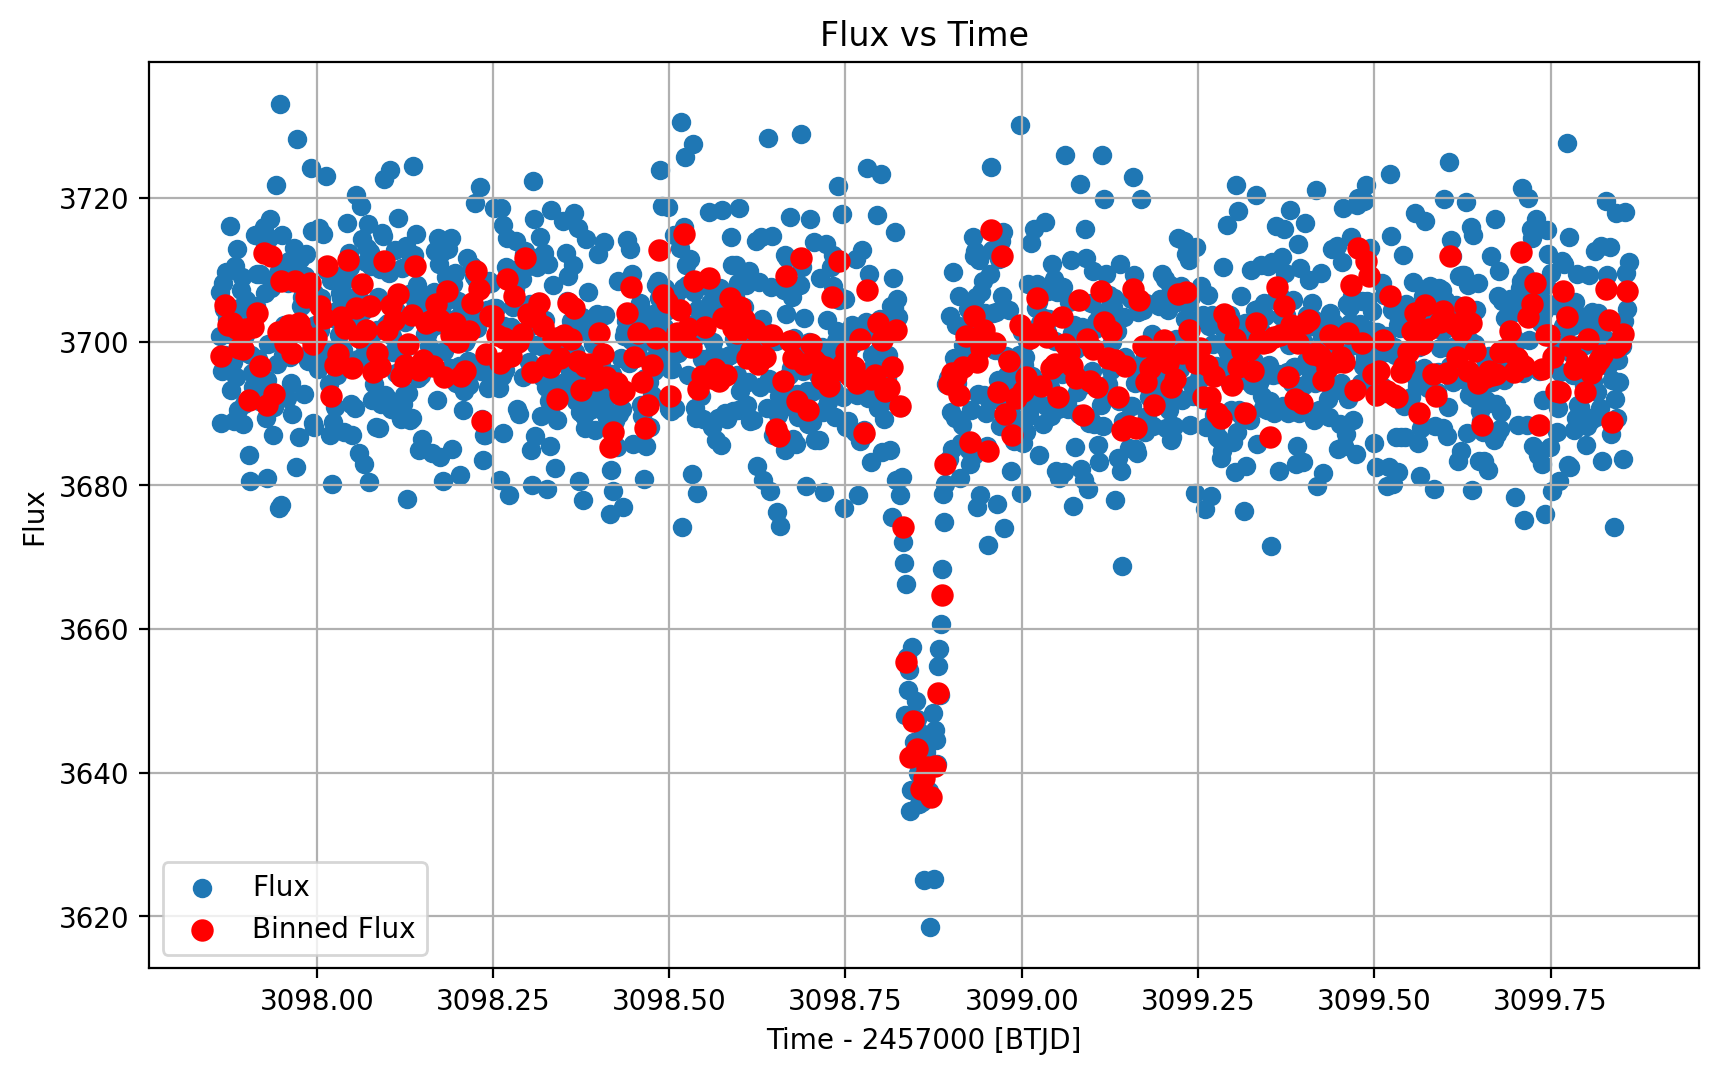

Do you wanna save this transit? (y/n): y
Plot saved.


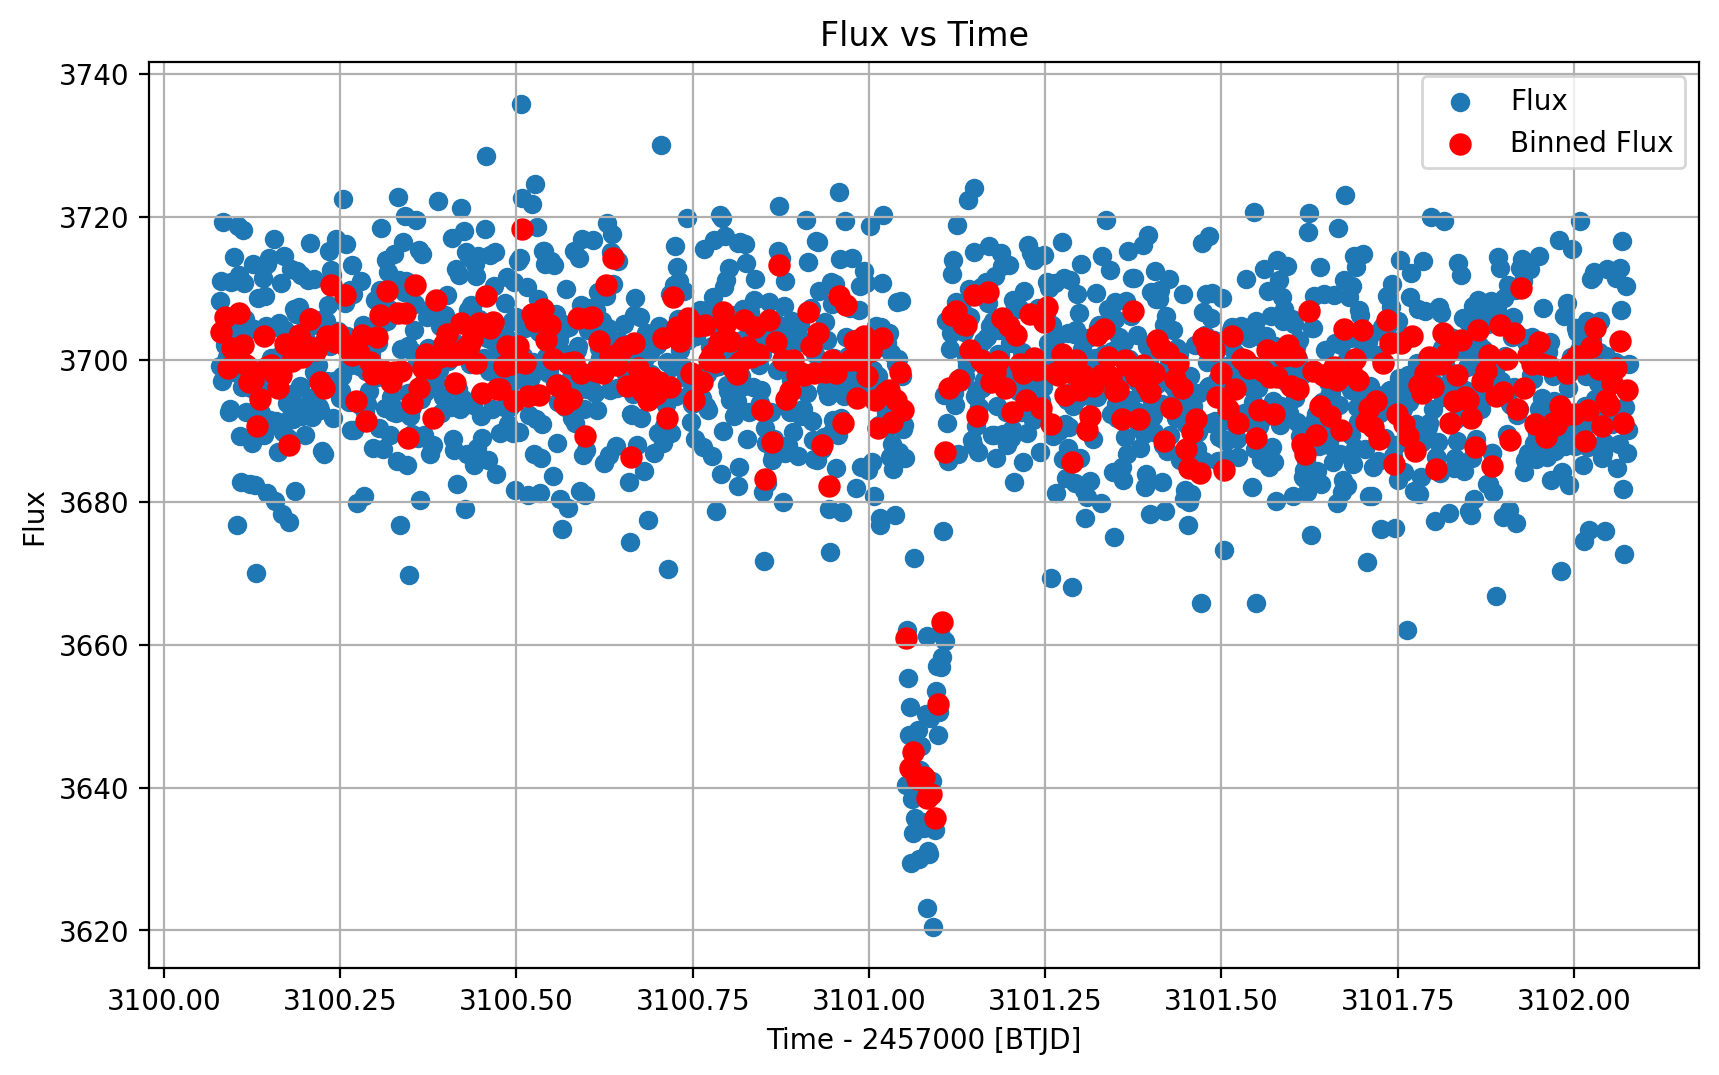

Do you wanna save this transit? (y/n): y
Plot saved.


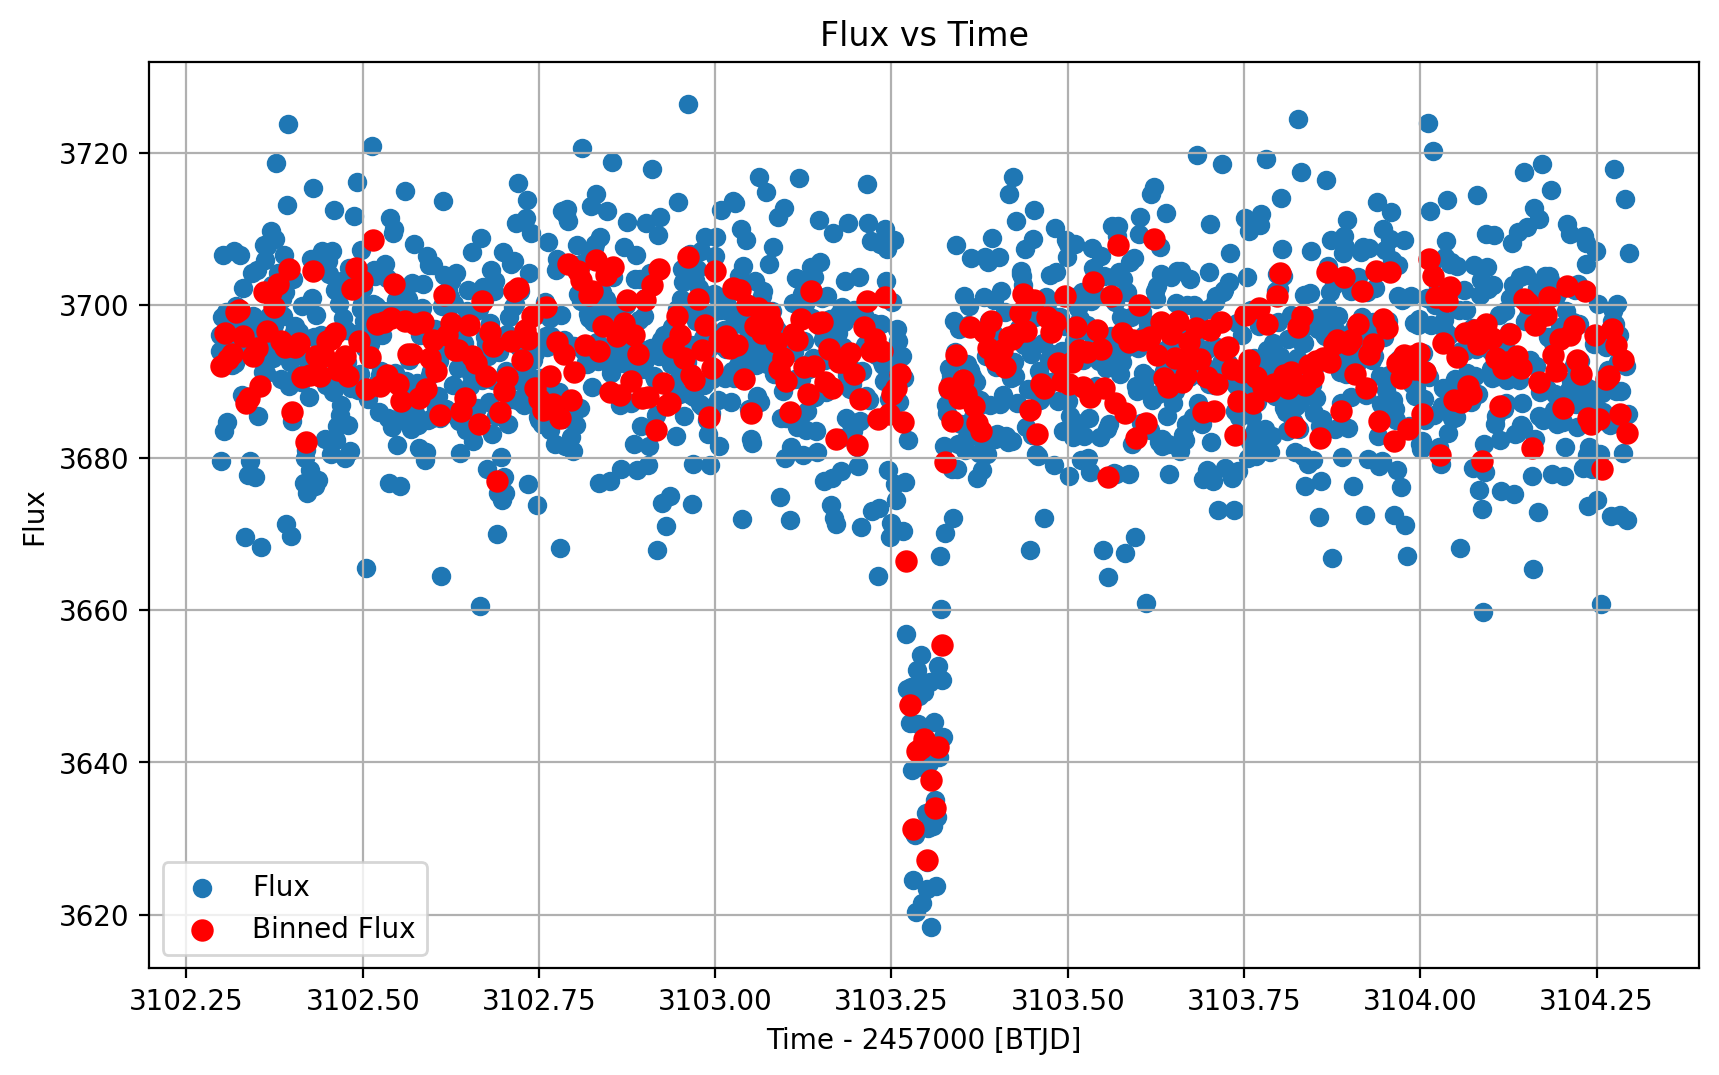

Do you wanna save this transit? (y/n): y
Plot saved.


/home/mashe/Desktop/MOTEred/TESS/TESS_Auto/Obtain_LC.py:122: RuntimeWarning: Mean of empty slice.
  bin_means_time = [time_data[bin_indices == i].mean() for i in range(1, num_bins + 1)]
/home/mashe/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/mashe/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


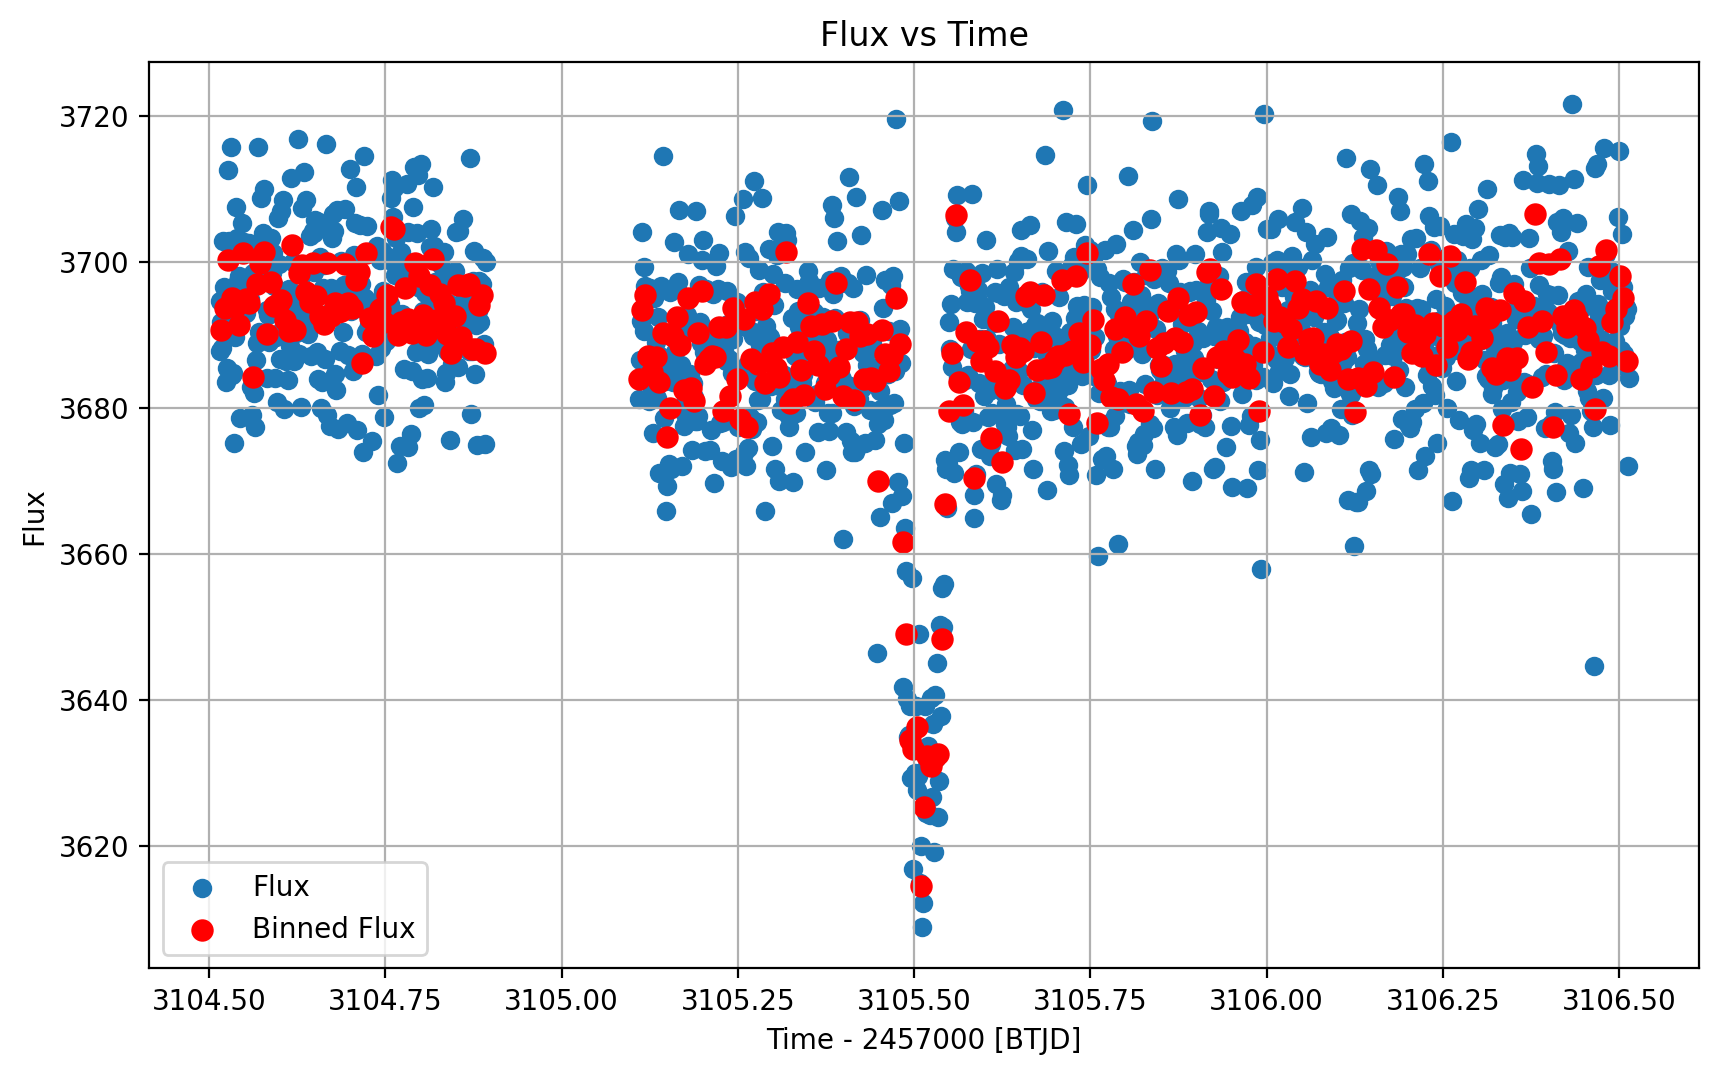

Do you wanna save this transit? (y/n): y
Plot saved.


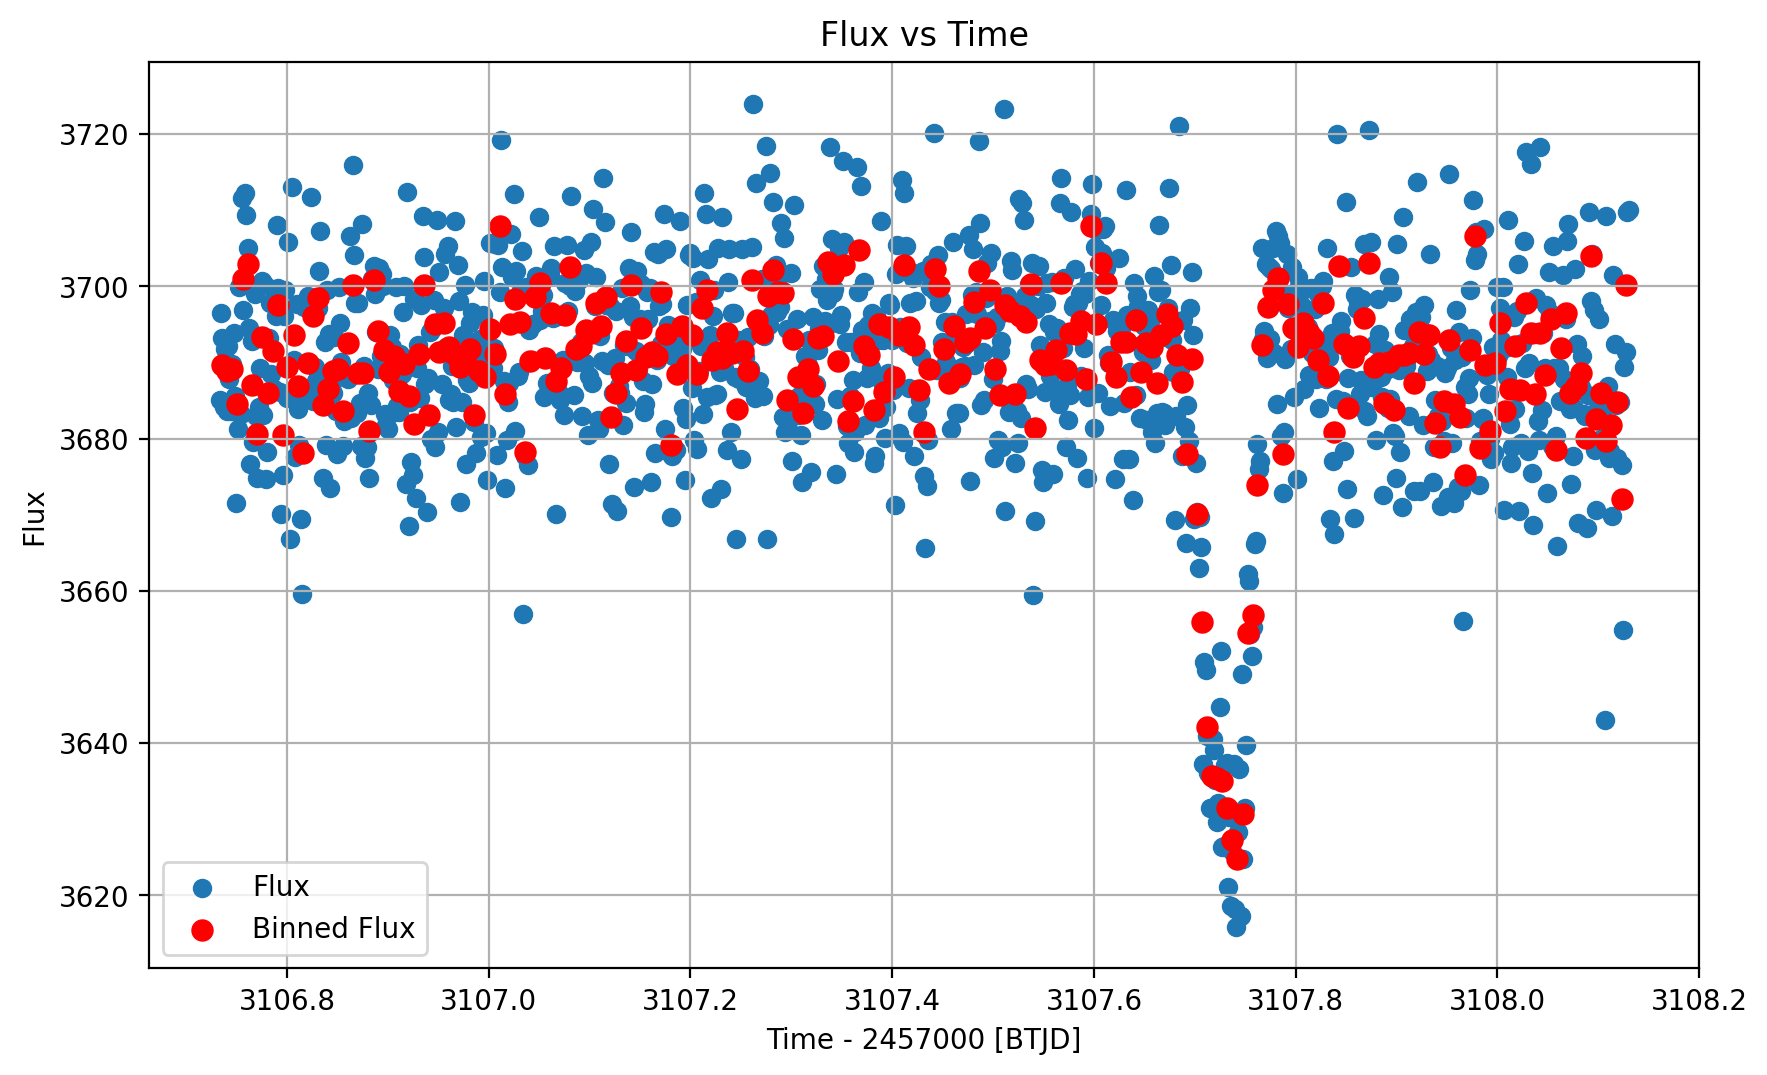

Do you wanna save this transit? (y/n): y
Plot saved.


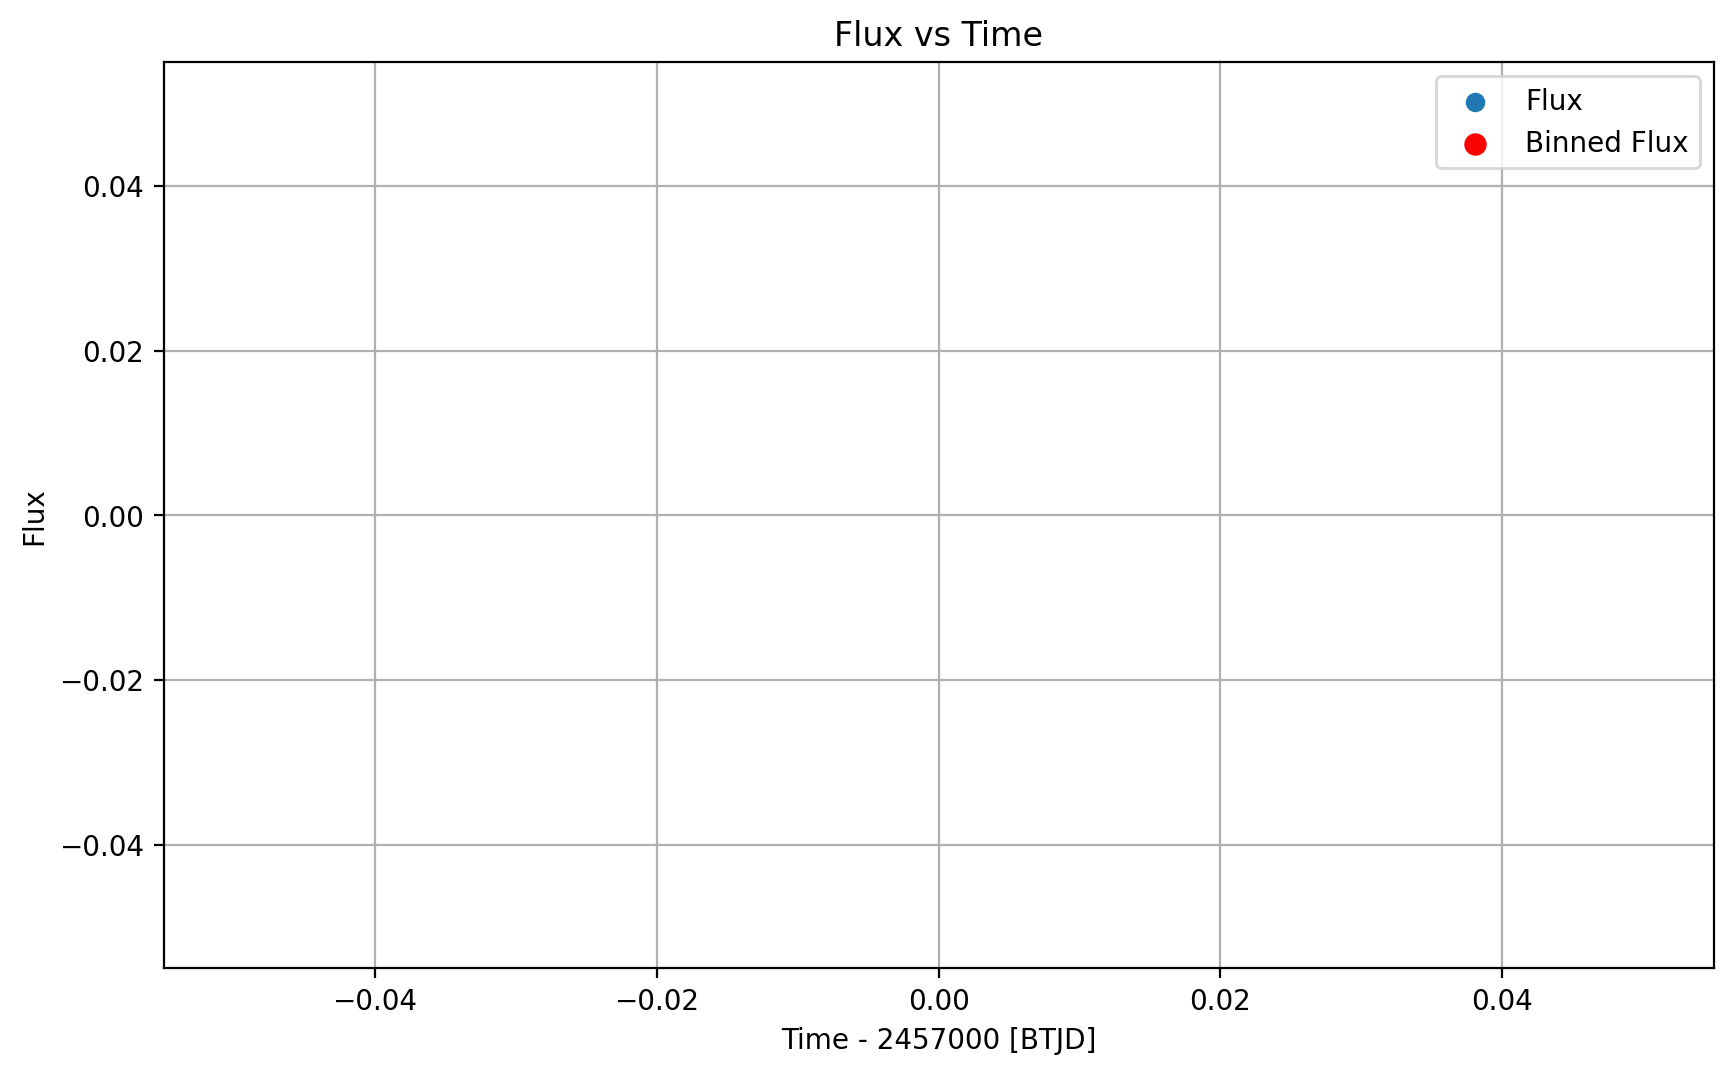

Do you wanna save this transit? (y/n): n
Plot skipped.


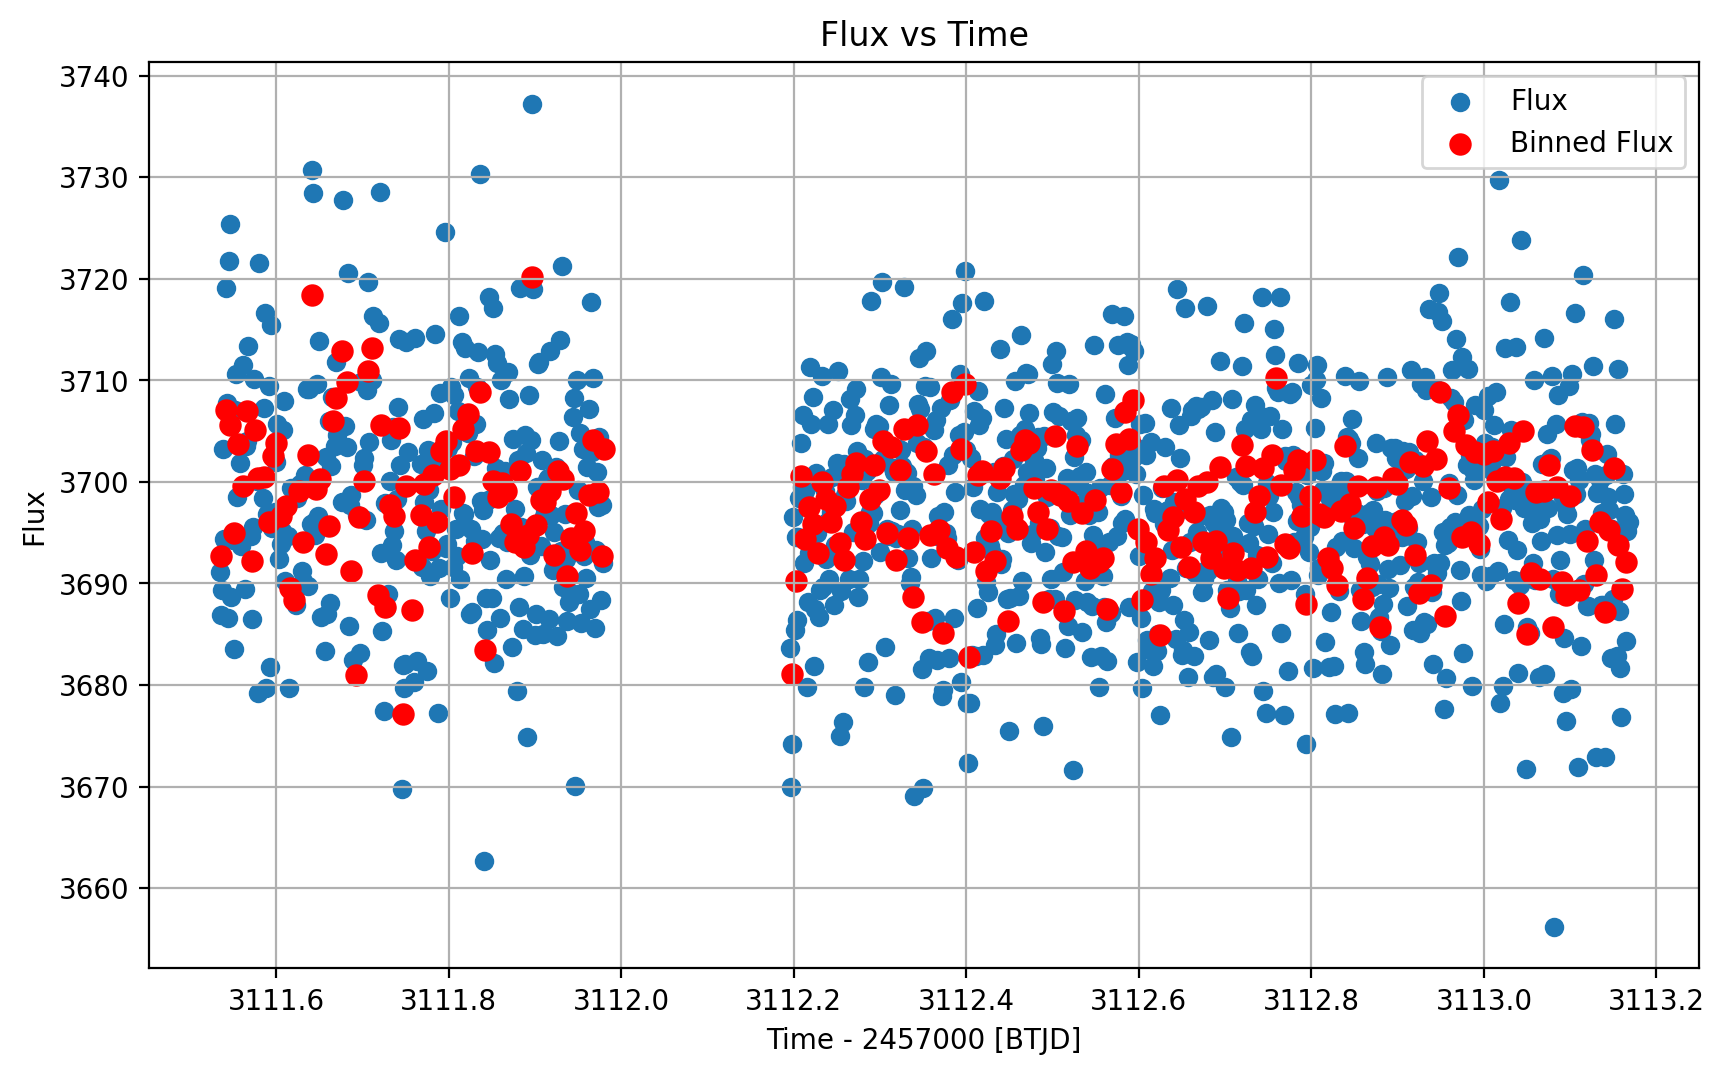

Do you wanna save this transit? (y/n): n
Plot skipped.


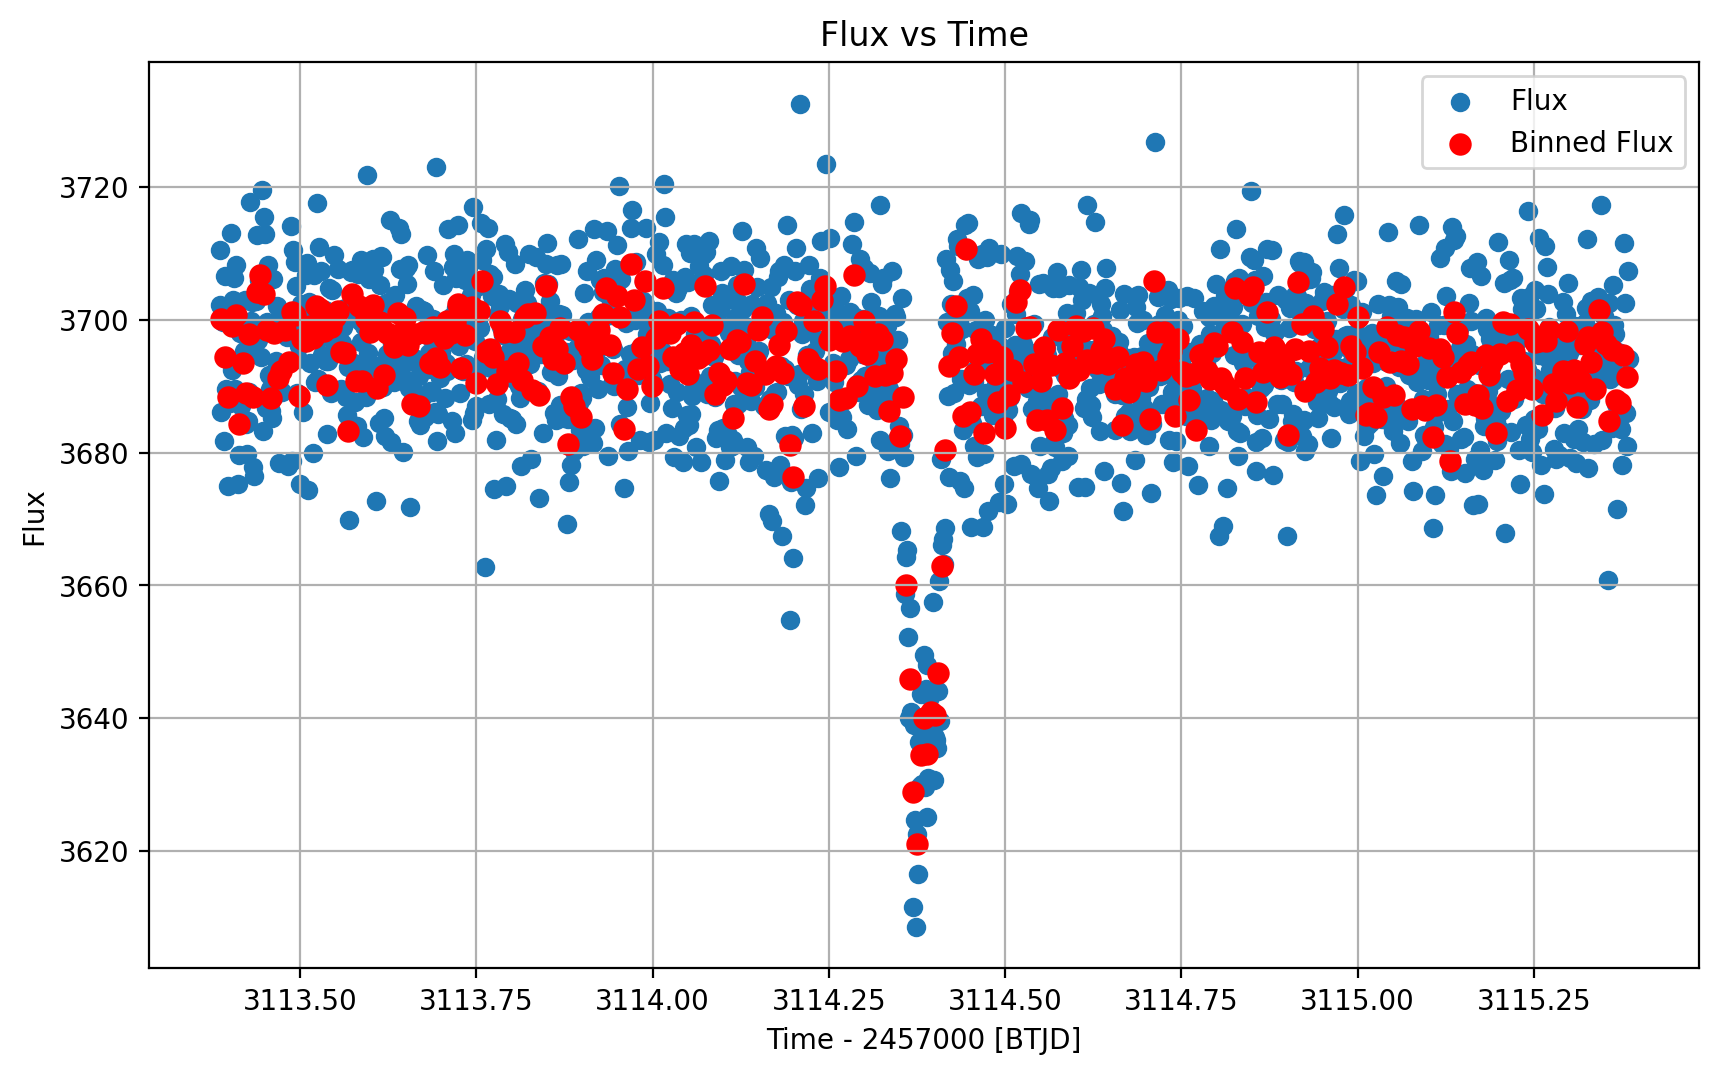

Do you wanna save this transit? (y/n): y
Plot saved.


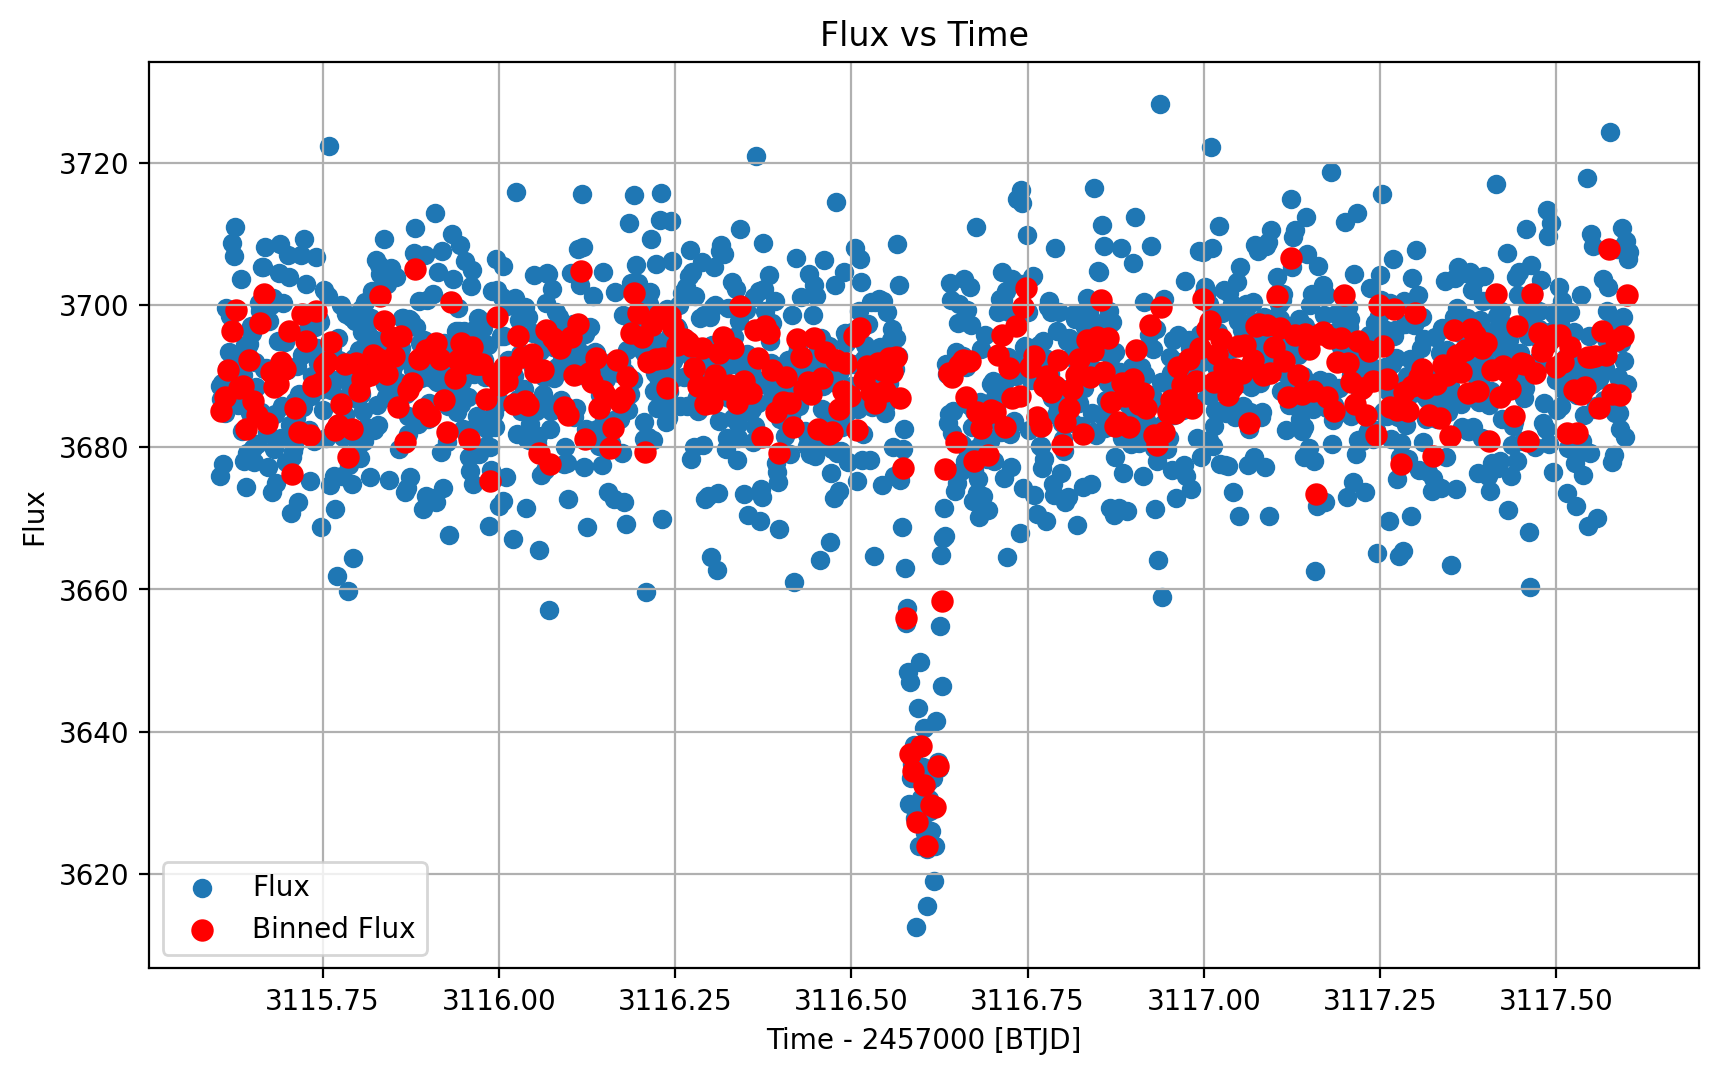

Do you wanna save this transit? (y/n): y
Plot saved.


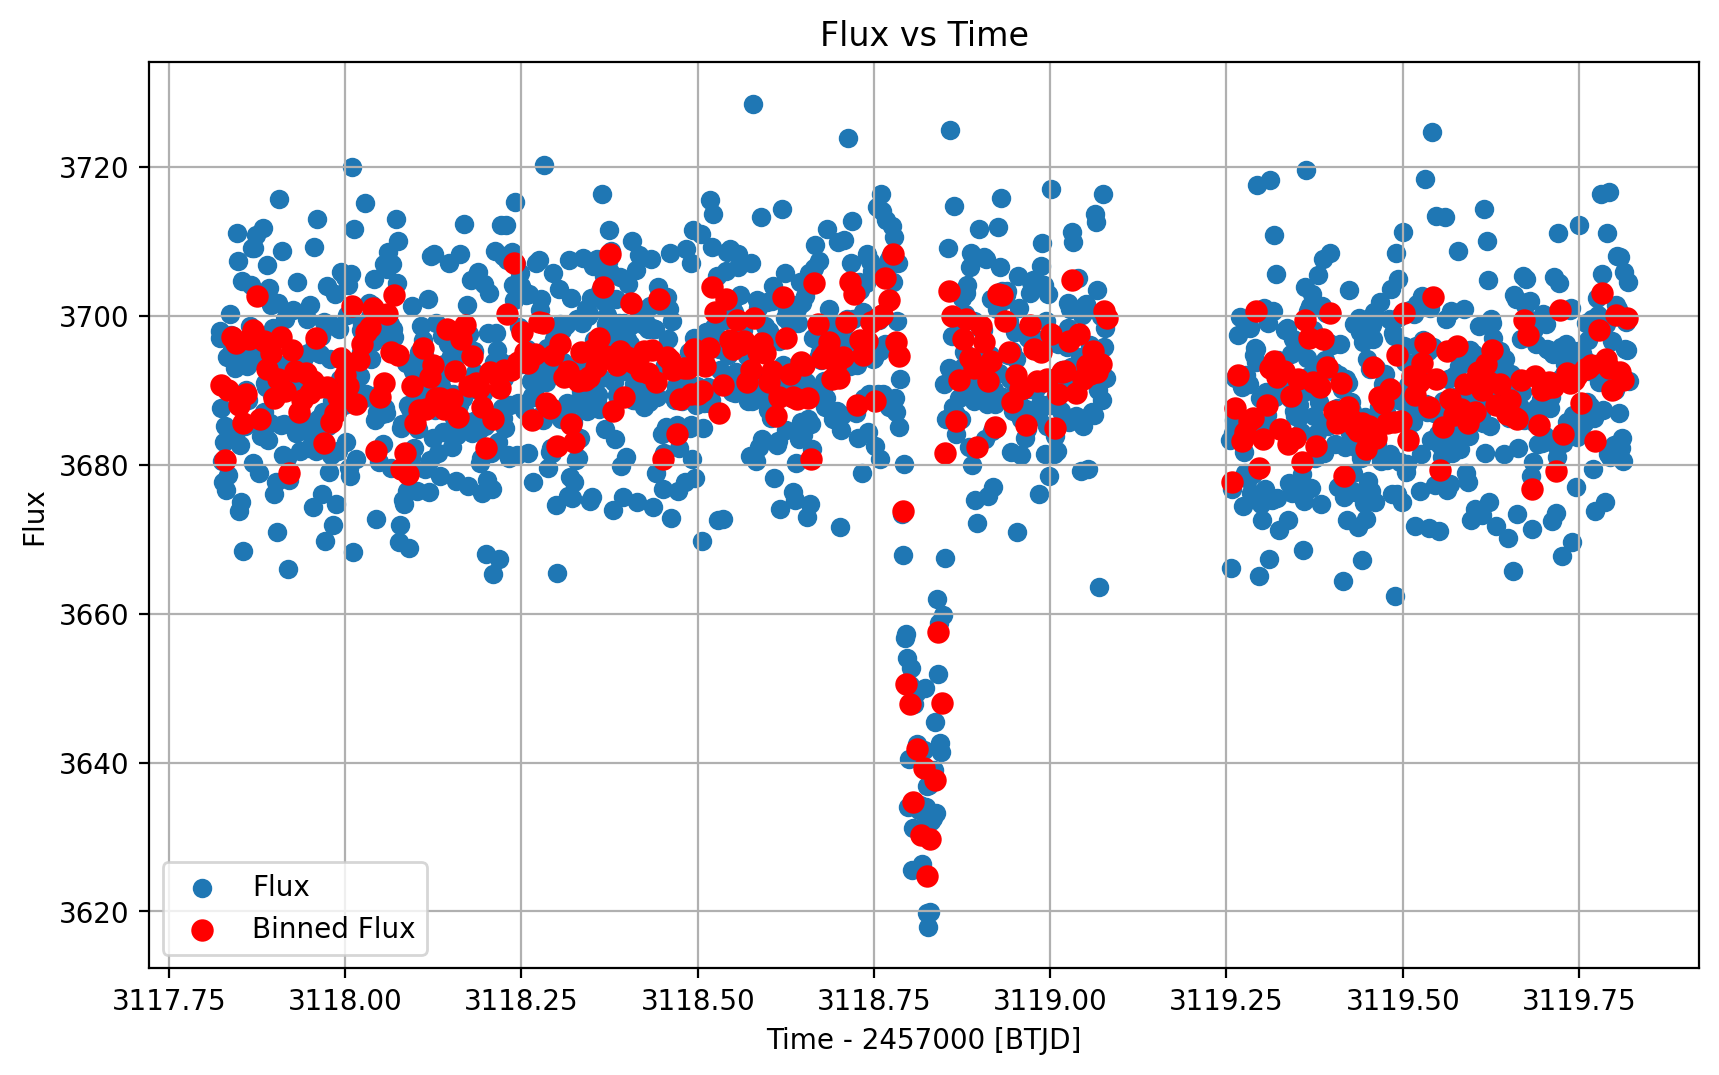

Do you wanna save this transit? (y/n): y
Plot saved.


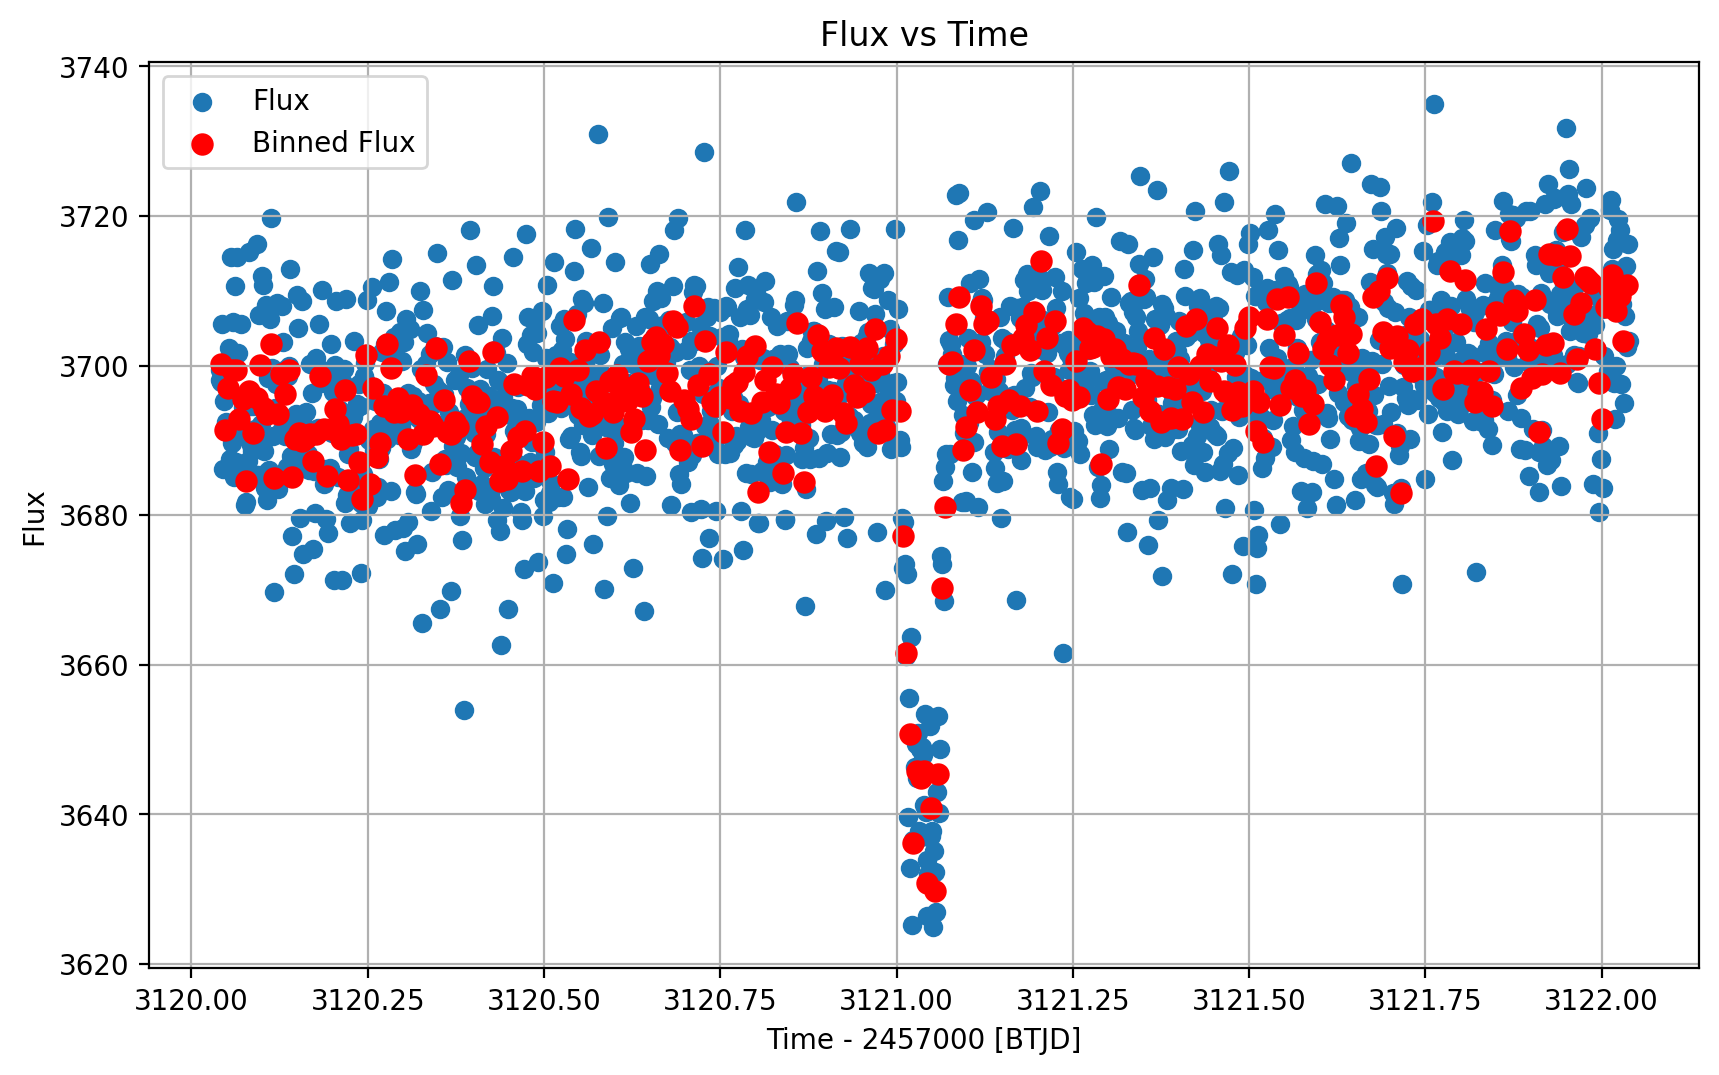

Do you wanna save this transit? (y/n): y
Plot saved.


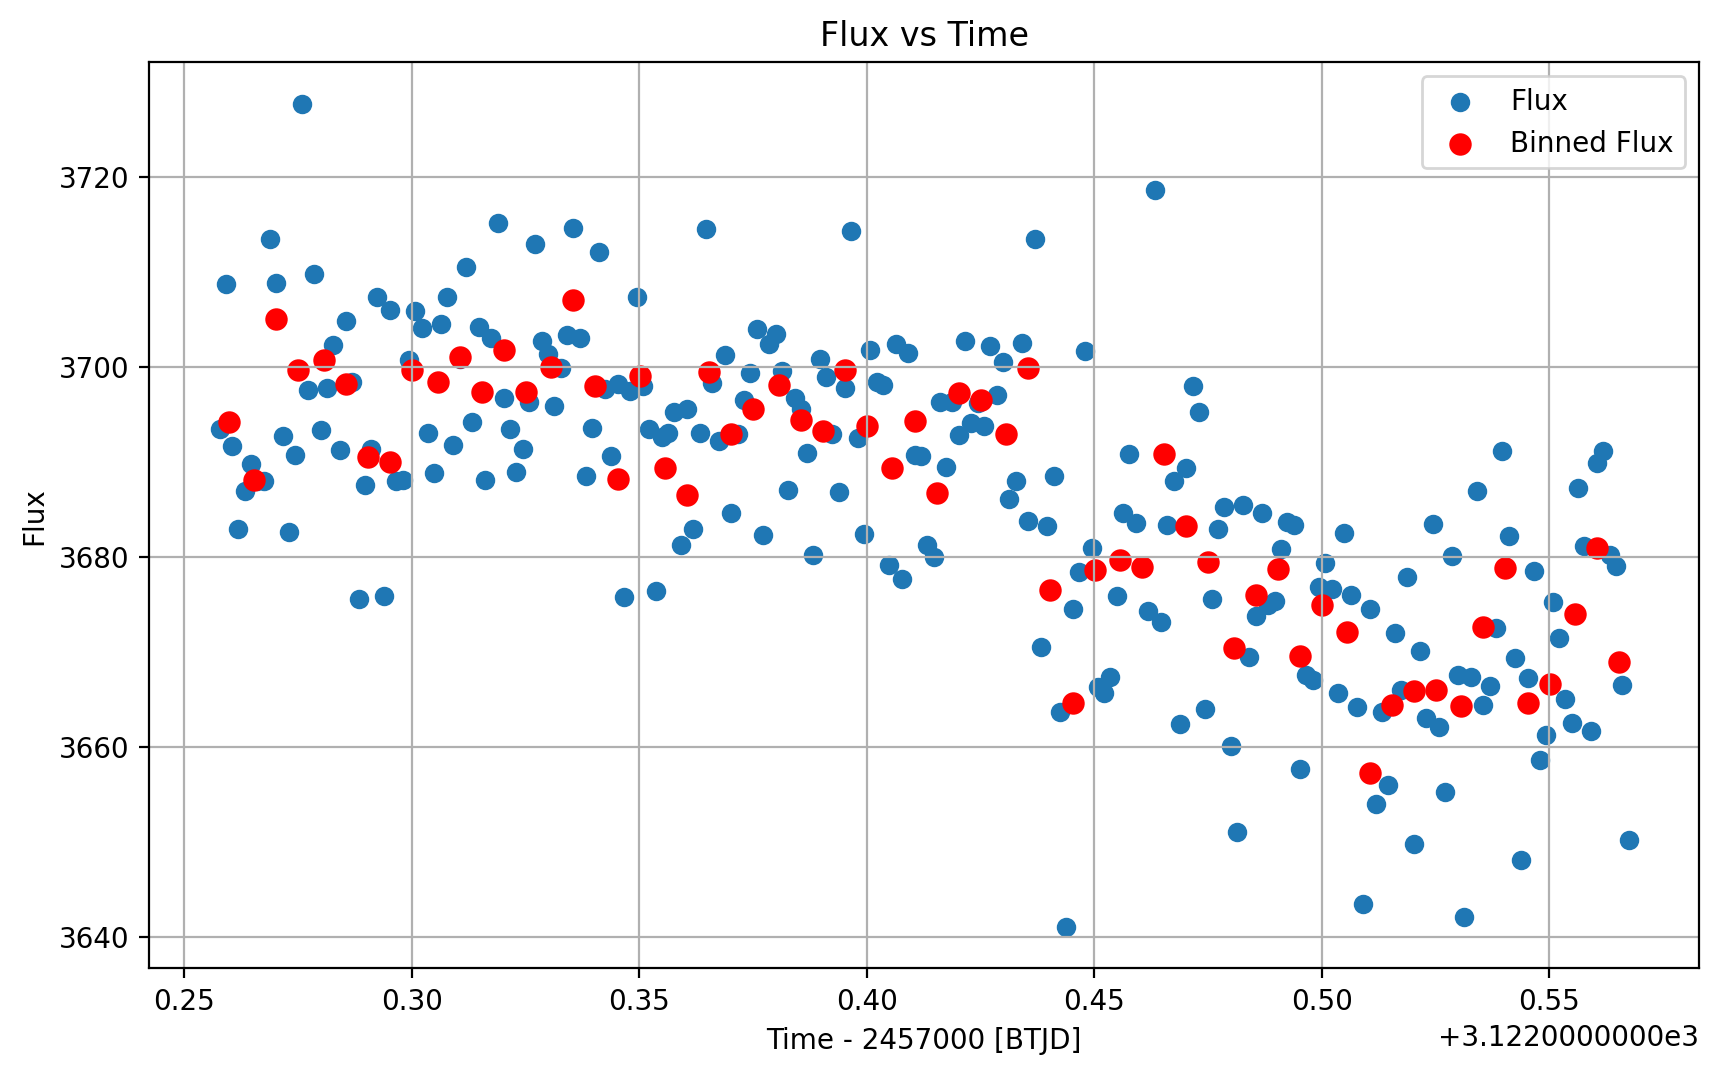

Do you wanna save this transit? (y/n): n
Plot skipped.


In [26]:
#Sepparating the possible transits.
#Your goal is to determinate if the transit is worth for saving

lc.select_transit(PATH, binned, name, transits)

Now that you have saved the data you needed go and apply models to them!!